In [248]:
using Distributions, Plots, LinearAlgebra, StatsBase;

In [249]:
function create_kmeans(X, k; I = 1000, norm = (x,v) -> sum((x-v).^2))
    
    # Tu wyliczam etykiety
    function get_label(x, centroids)
        return argmin(map(i -> norm(x, centroids[i,:]), 1:size(centroids,1)))
    end
    
    # Tu wyliczam centroidy
    function compute_centroids(X, labels) 
        centroids = zeros(k, size(X,2))
        for l in 1:k
            centroids[l,:] = mean(X[labels .== l, :], dims = 1)
        end
        return centroids
    end
    
    centroids = X[sample(1:size(X,1), k, replace=false), :]
    labels = zeros(size(X,1),1)
    
    for i in 1:I
        labels = map(i -> get_label(X[i,:], centroids), 1:size(X,1))
        centroids = compute_centroids(X, labels)
    end
    
    return x -> get_label(x, centroids), centroids, labels
end

create_kmeans (generic function with 2 methods)

In [250]:
"""
K - vector of k's for every label
"""
function create_meanClassifier(X, labels; K = missing, I = 1000)
    
    norm(x,v) = sum((x-v).^2)
    
    uniqueLabels = unique(labels)
    println("Unique labels  : $uniqueLabels")
    
    if ismissing(K)
        K = div.(sort(countmap(labels)).vals, 50)
    end
    println("K              : $K")
    
    
    
    centroids = zeros(sum(K), size(X,2))
    K_ind = [1; cumsum(K).+1]
    println("K_ind          : $K_ind")
    
    
    for l in uniqueLabels
        println("--->l          : $l")
        
        subsetX = X[labels .== l, :]
        #println("--->subsetX    : $(subsetX[1, :])")
        
        _, subcentroids, _ = create_kmeans(subsetX, K[l], I = I)
        println("--->centroids computed")
        
        centroids[K_ind[l]:(K_ind[l+1]-1), :] = subcentroids
        
    end
    
    function get_label(v, centroids, K_ind)
        (1:(length(K_ind)-1))[argmin(map(i -> sum((v - centroids[i,:]).^2), 1:size(centroids,1))) .< K_ind[2:end]][1]
    end
    
    return v -> get_label(v, centroids, K_ind), centroids
end

create_meanClassifier

# Test

In [251]:
n = 1000

#Inicjalizacja
X = rand(Normal(0,1), 2n, 2)

#Przestawienie
X[(n+1):end, :] .+= [2 6]

#Zniekształcenie
X[:,2] += 4sin.(1.2X[:,1] .- 0.9)


labels = repeat(1:2, inner=n);

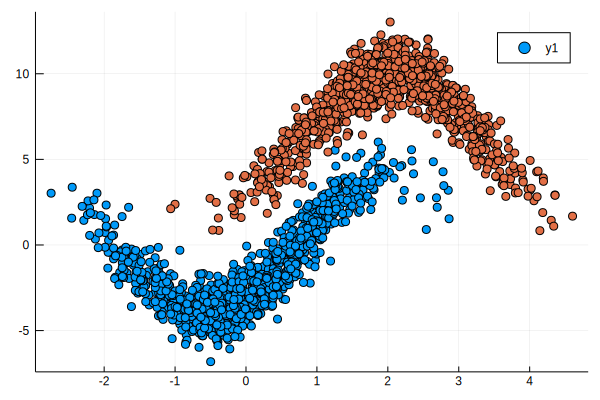

In [252]:
scatter(X[:,1], X[:,2], markercolor=labels)

In [271]:
meanClassifier, centroids = create_meanClassifier(X, labels, K=[5, 5], I=100)

Unique labels  : [1, 2]
K              : [5, 5]
K_ind          : [1, 6, 11]
--->l          : 1
--->centroids computed
--->l          : 2
--->centroids computed


(getfield(Main, Symbol("##527#531")){getfield(Main, Symbol("#get_label#529"))}(Core.Box([-0.281561 -2.36943; 0.742341 0.0621219; … ; 2.03336 10.4877; 2.02163 8.86673]), Core.Box([1, 6, 11]), getfield(Main, Symbol("#get_label#529"))()), [-0.281561 -2.36943; 0.742341 0.0621219; … ; 2.03336 10.4877; 2.02163 8.86673])

In [272]:
meanClassifier([1,2])

1

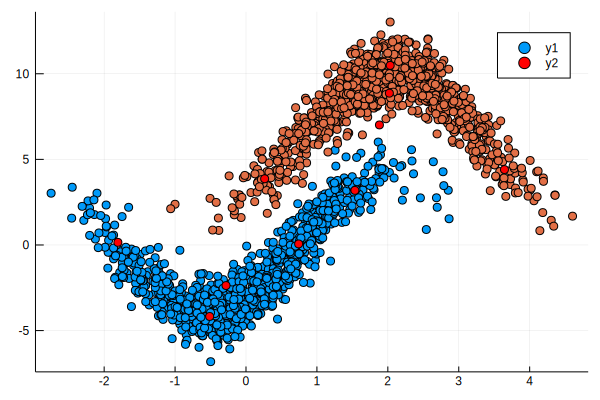

In [273]:
scatter(X[:,1], X[:,2], markercolor=labels)
scatter!(centroids[:,1], centroids[:,2], markercolor = :red)

Test data:

In [274]:
T = [rand(Uniform(-3, 5), n) rand(Uniform(-7, 15), n)];

In [275]:
labelsT = map(i -> meanClassifier(T[i,:]), 1:size(T,1));

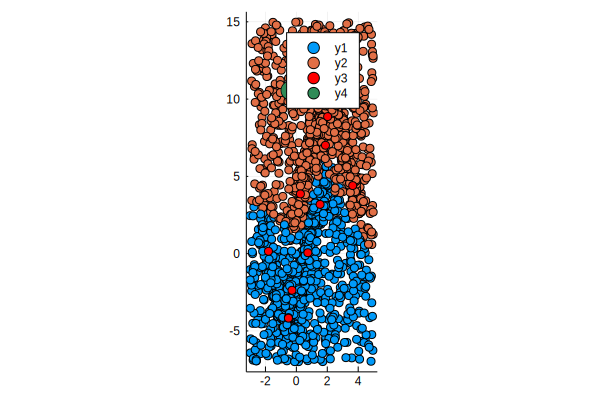

In [277]:
scatter(X[:,1], X[:,2], markercolor=labels, aspect_ratio=:equal)
scatter!(T[:,1],T[:,2], markercolor = labelsT)
scatter!(centroids[:,1], centroids[:,2], markercolor = :red)
scatter!(T[2:2,1],T[2:2,2], markercolor = :seagreen, markersize = 10)

Działa!

# XOR test

In [288]:
n = 1000
Xor = rand(Uniform(0,1), n,2)
labels = ones(Int, n)
labels[(Xor[:,1].>0.5) .& (Xor[:,2].>0.5)] .= 2
labels[(Xor[:,1].<0.5) .& (Xor[:,2].<0.5)] .= 2;

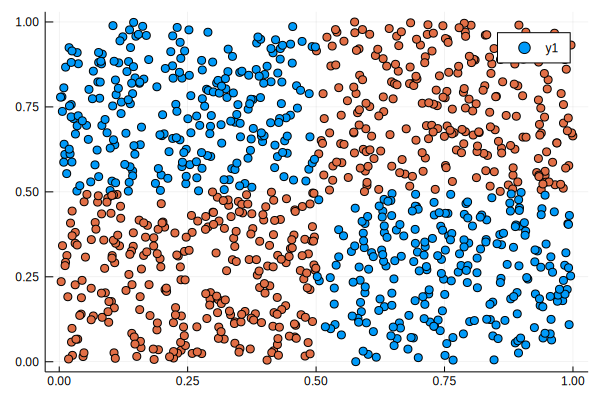

In [291]:
scatter(Xor[:,1], Xor[:,2], markercolor = labels)

In [300]:
mc_xor, centroids = create_meanClassifier(Xor, labels)

Unique labels  : [1, 2]
K              : [9, 10]
K_ind          : [1, 10, 20]
--->l          : 1
--->centroids computed
--->l          : 2
--->centroids computed


(getfield(Main, Symbol("##527#531")){getfield(Main, Symbol("#get_label#529"))}(Core.Box([0.122824 0.85497; 0.179036 0.600135; … ; 0.0703789 0.145511; 0.198511 0.0509981]), Core.Box([1, 10, 20]), getfield(Main, Symbol("#get_label#529"))()), [0.122824 0.85497; 0.179036 0.600135; … ; 0.0703789 0.145511; 0.198511 0.0509981])

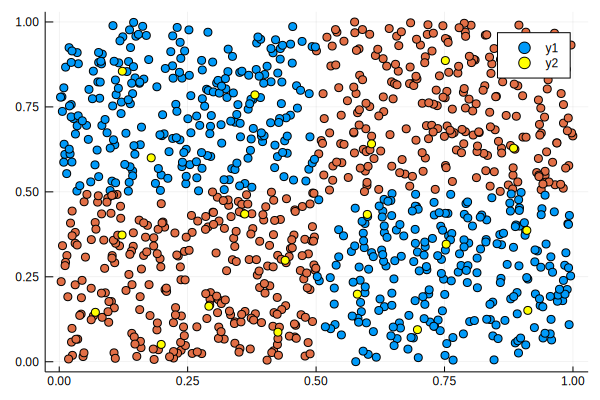

In [301]:
scatter(Xor[:,1], Xor[:,2], markercolor = labels)
scatter!(centroids[:,1],centroids[:,2], markercolor = :yellow)